# Quantitative Methods in Finance II: Fat Tail Analysis

*By Daniel Jorge Deutsch*

In [1]:
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as smts
from matplotlib import pyplot as plt
from scipy import stats

c:\Users\Dell\Desktop\Code\FTD\Quantitative Methods II\Fat Tail\venv\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
# Ignores warnings
warnings.filterwarnings('ignore')

# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

# Dataset

The dataset chosen for this project consists on records of natural disasters around the globe since 1900. It can be found at the [emdat](https://public.emdat.be/data) website. More specifically, once you have an account in emdat's platform, the dataset can be downloaded via this [url](https://public.emdat.be/api/files/emdat_public_2022_01_24_query_uid-LeeRPA.xlsx).

In [3]:
# Reads the dataset
columns = ['dos_no', 'year', 'seq', 'glide', 'disaster_group', 'disaster_subgroup', 'disaster_type', 'disaster_subtype', 'disaster_subsubtype', 'event_name', 'country', 'iso', 'region', 'continent', 'location', 'origin', 'associated_dis', 'associated_dis2', 'ofda_response', 'appeal', 'declaration', 'aid_contribution', 'dis_mag_value', 'dis_mag_scale', 'latitude', 'longitude', 'local_time', 'river_basin', 'start_year', 'start_month', 'start_day', 'end_year', 'end_month', 'end_day', 'total_deaths', 'no_injured', 'no_affected', 'no_homeless', 'total_affected', 'reconstruction_costs', 'reconstruction_costs_adjusted', 'insured_damages', 'insured_damages_adjusted', 'total_damages', 'total_damages_adjusted', 'cpi', 'adm_level', 'admin1_code', 'admin2_code', 'geo_locations']
df = pd.read_excel("./LeeRPA.xlsx", header=6, names=columns)

# Converts dtypes
df = df.apply(pd.to_numeric, errors='ignore')

df

,dos_no,year,seq,glide,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,disaster_subsubtype,event_name,...,reconstruction_costs_adjusted,insured_damages,insured_damages_adjusted,total_damages,total_damages_adjusted,cpi,adm_level,admin1_code,admin2_code,geo_locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,746154.0,3.350513,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16229,2021-0449-YEM,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3408;3410;3411;3412;3413;3414;3415;3416;3418;3...,NaN,"Al Bayda, Al Dhale'e, Al Hudaydah, Al Jawf, Al..."
16230,2021-0075-ZAF,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,75000.0,NaN,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16231,2021-0599-COD,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,14994,Tshopo (Adm2).
16232,2021-0020-SRB,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


## Visual of the Time Series

### Frequency Over Time

In the following plot we can see the number of natural disasters sice the begining of the last century until nowadays.

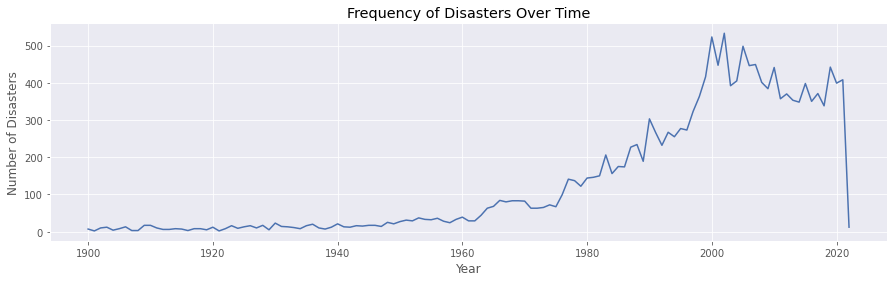

In [4]:
# Plots the frequency of disasters over time
df.groupby('year').size().plot()
plt.title("Frequency of Disasters Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.show()

From the plot above, one can clearly see that there is a tendency in increasing the amount of natural disasters over the past century. It is important to say, though, that the lower amount natural disasters in the begining of the 20th century could be due to lack of records of natural disasters at the time (either because of lack of technology or lack of necessity of storing this type of information at the time).

### Total Damages Adjusted Over Time

On the plot below one can check the adjusted total damages caused by the accidents in each year.

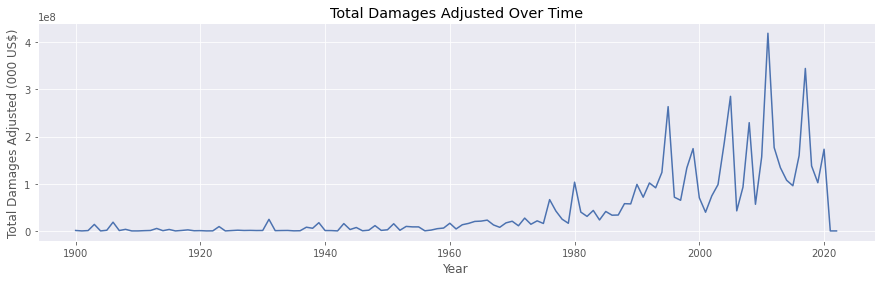

In [5]:
# Plots the adjusted damages over time
df.groupby('year')['total_damages_adjusted'].sum().plot()
plt.title("Total Damages Adjusted Over Time")
plt.xlabel("Year")
plt.ylabel("Total Damages Adjusted (000 US$)")
plt.show()

By analyzing the plot above, one can see that the combination of later years disasters tend to have a higher damage when compared to the ones registered in the begining of the past century.

## Histogram of Log-Scaled Total Damages Adjusted

Below, one can check the histogram of total damages.

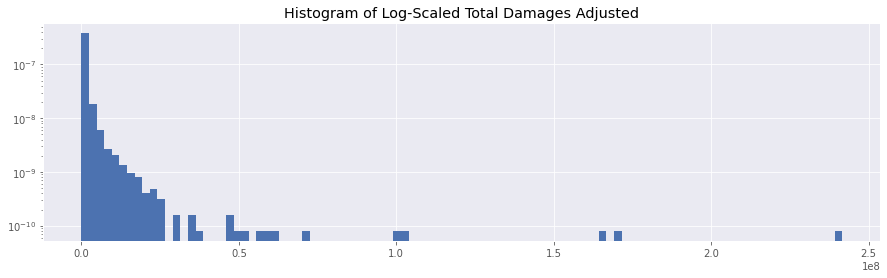

In [6]:
# Obtains the total damages adjusted without nan and outliers
total_damages_adjusted = df['total_damages_adjusted'].dropna()

# Plots the histogram of the total damages adjusted
plt.hist(total_damages_adjusted, bins=100, density=True, log=True)
plt.title("Histogram of Log-Scaled Total Damages Adjusted")
plt.show()

# Deletes the series from memory
del total_damages_adjusted

From the plot above its clear to see that there is a higher concentration of disasters that didn't cause a big impact in total damages adjusted.

# Rolling Window Estimate

## Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller test is a unit root test that checks for stationarity. It considers the following hypotesis:

\begin{aligned}
    H_0: & \quad \text{there is a unit root (the series contains a stochastic trend and is non-stationary)} \\
    H_1: & \quad \text{there isn't a unit root (the series doesn't contain a stochastic trend and is stationary)}
\end{aligned}

Once the Augmented Dickey-Fuller Test is performed and we have obtained our results, we should consider the following to take our conclusions:

- If the p-value is lower than 0.01, than we must reject the null hypotesys (and, consequently, accept the alternativel one).
- If the p-value is slightly above 0.01, then the critical values should be used to judge whether to reject the null hypotesis.

<br>

We, then, implement the augmented Dickey-Fuller Test to the most general regression:

\begin{aligned}
    \Delta X_t = b_0 + b_1 t + \rho X_{t-1} + \sum^{p-1}_{j=1} \varphi_j \Delta_{t-j} + \varepsilon_t 
\end{aligned}

In this case, the hypotesis can be written as:

\begin{aligned}
    H_0: & \quad \rho = 0 \\
    H_1: & \quad \rho < 0
\end{aligned}

In [7]:
# Obtains the ADF results for the general regression
adf_res = smts.adfuller(
    df['total_damages_adjusted'].dropna(), 
    regression='ct',
    regresults=True
)

# Show test results
print(f"T-statistic: {adf_res[0]}")
print(f"P-value: {adf_res[1]}")
print(f"Used lag: {adf_res[3].usedlag}")

T-statistic: -72.02706594415167
P-value: 0.0
Used lag: 0


From the results printed above, one can see that the p-value is close to zero, and the T-statistic has a higher absolute value greater than the absolute value of the critical value at 1% (-4.04). Therefore, we reject the null-hypothesis of non-stationarity.

Once we can consider that the series is stationary, i.e., the total damage adjusted costs  statiscal properties don't change over time, we are able to estimate the time series distribution based on the historical data.

## Selection of Pareto Distribution

As studied in class, there are several variations of the Pareto distribution. In this project I decided to consider two of them: Pareto Type I and Pareto Type II.

The first one is bounded from below with $u > 0$ and with tail parameter $\alpha$. Its probability density function $f(x)$ and its cumulative distribution function $F(x)$ are given by:

\begin{aligned}
    f(x) & = \frac{\alpha u^\alpha}{x^{\alpha + 1}}
    &&& \quad \quad \quad
    F(x) & = 1 - \left(\frac{x}{u}\right)^{-\alpha}
\end{aligned}

The second one is bounded from below with $u \geq 0$, with scale parameter $\sigma > 0$ and with tail parameter $\alpha \in ]0, +\infty[$. Its probability density function $f(x)$ and its cumulative distribution function $F(x)$ are given by:

\begin{aligned}
    f(x) & = \frac{1}{\sigma} \left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-(\frac{1}{\xi + 1})}
    &&& \quad \quad \quad
    F(x) & = 1 - \left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-\frac{1}{\xi}}
\end{aligned}

*In the equations above the $\xi$ variable is the shape parameter, which can be obtained by $\xi = \frac{1}{\alpha}$.*

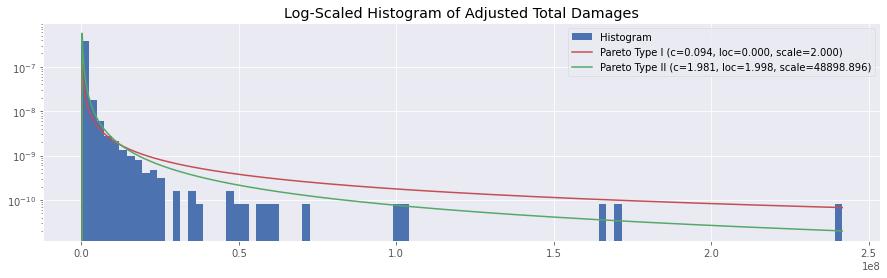

In [8]:
# Obtains the total damages adjusted without nan
total_damages_adjusted = df['total_damages_adjusted'].dropna()

# Obtains the Pareto Type I and Generalized Pareto parameters for the data
xi_pareto, loc_pareto, scale_pareto = stats.pareto.fit(total_damages_adjusted, floc=0)
xi_genpareto, loc_genpareto, scale_genpareto = stats.genpareto.fit(total_damages_adjusted)

# Instantiates a linspace for the x-axis
x = np.linspace(0, total_damages_adjusted.max(), 1000)

# Plots the histogram and the pdfs of the Pareto distributions of the total damages adjusted
plt.hist(total_damages_adjusted, bins=100, density=True, log=True, label='Histogram')
plt.plot(x, stats.pareto(xi_pareto, loc=loc_pareto, scale=scale_pareto).pdf(x), label=f"Pareto Type I (c={xi_pareto:.3f}, loc={loc_pareto:.3f}, scale={scale_pareto:.3f})")
plt.plot(x, stats.genpareto(xi_genpareto, loc=loc_genpareto, scale=scale_genpareto).pdf(x), label=f"Pareto Type II (c={xi_genpareto:.3f}, loc={loc_genpareto:.3f}, scale={scale_genpareto:.3f})")
plt.title("Log-Scaled Histogram of Adjusted Total Damages")
plt.legend()
plt.show()

From the plot above, we can observe that the Pareto Type II distribution seems to fit better the data when compared to Pareto Type I. This can be confirmed by the maximized log-likelihood of the distribution models:

In [9]:
# Obtains the log-likelihood for both distributions
pareto_loglikelihood = np.sum(np.log(stats.pareto(xi_pareto, loc=loc_pareto, scale=scale_pareto).pdf(total_damages_adjusted)))
genpareto_loglikelihood = np.sum(np.log(stats.genpareto(xi_genpareto, loc=loc_genpareto, scale=scale_genpareto).pdf(total_damages_adjusted)))

# Prints results
print(f"Log-likelihood of Pareto Type I: {pareto_loglikelihood:.3f}")
print(f"Log-likelihood of Pareto Type II: {genpareto_loglikelihood:.3f}")

Log-likelihood of Pareto Type I: -75917.438
Log-likelihood of Pareto Type II: -71152.069


As the log-likelihood of the Pareto Type II distribution is greater than the one from Pareto Type I distribution, we can say that this distribution better describes the data.

## Pareto Type I Rolling Window Parameter Estimations

In spite of observing that the Pareto Type II distribution is a better fit for the data, I decided to pursue the rolling window analysis based on Pareto Type I distribution due to its simplicity of calculations. One can check below the qq-plot considering the Pareto Type I distribution.

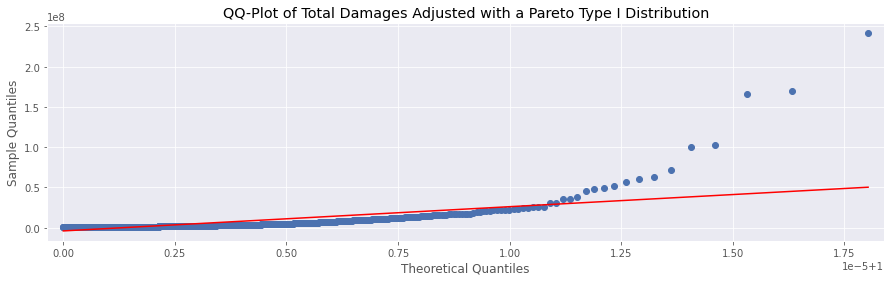

In [10]:
# Uniform law between 0 and 100, to check the impact of a different percentile
percentilei = np.random.uniform(0, 100, 1)
u = np.percentile(total_damages_adjusted, percentilei)[0]

# Plots the qq-plot for the Pareto type I distribution
sm.qqplot(np.array([x for x in total_damages_adjusted if x > u]), dist=stats.pareto, distargs=(u, ), line='r')
plt.title("QQ-Plot of Total Damages Adjusted with a Pareto Type I Distribution")
plt.show()

Once I'm using Pareto Type I distribution to estimate the parameters, it is possible to obtain $\alpha$ from the Hill estimator, which is given by the following:

\begin{align*}
    \hat{\alpha} & = \left( \frac{1}{N} \sum_{i} (log \ x_i - log \ u) \right)^{-1}
\end{align*}  

Where $N$ is the number of samples in the window. 

According to [Langousis, A., Mamalakis, A., Puliga, M., and Deidda, R. (2016)](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/2015WR018502) the threshold $u$, can be obtained by observing the plot of $E[X - u | X > u]$ x $u$ and end selecting the $u$ inside the interval where the expected value behaves linearly. In code, it can be obtained by:

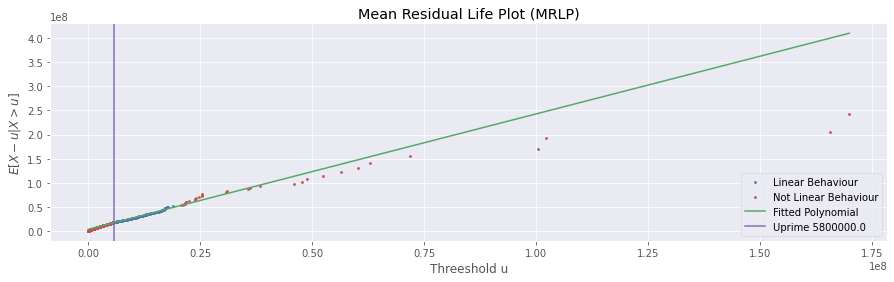

In [11]:
# Obtains the total damages adjusted without nan
total_damages_adjusted = np.sort(df['total_damages_adjusted'].dropna().values)

# Calculates the expected value E[X - u | X > u]
expected_values = np.array([np.mean(total_damages_adjusted[total_damages_adjusted > u]) for u in total_damages_adjusted])

# Removes nan from the expected values and the correspondent total_damages_adjusted
nan_indexes = np.argwhere(np.isnan(expected_values))[0]
expected_values = np.delete(expected_values, nan_indexes)
total_damages_adjusted = np.delete(total_damages_adjusted, nan_indexes)

# Obtains the first degree polynomial that fits the values in the linear interval
lower, upper = 5000, 5130   # Upper and lower bound of the linear interval
a, b = np.polyfit(total_damages_adjusted[lower:upper], expected_values[lower:upper], 1)

# Defines uprime (by observing the plot)
uprime = total_damages_adjusted[lower]

# Plots the Mean Residual Life
plt.scatter(total_damages_adjusted[lower:upper], expected_values[lower:upper], s=5, label="Linear Behaviour")
plt.scatter(np.delete(total_damages_adjusted, range(lower, upper+1)), np.delete(expected_values, range(lower, upper+1)), s=5, label="Not Linear Behaviour")
plt.plot(total_damages_adjusted, a*total_damages_adjusted + b, label="Fitted Polynomial", color='#55A868')
plt.axvline(x=uprime, label=f"Uprime {uprime}", color='#8172B2')
plt.title("Mean Residual Life Plot (MRLP)")
plt.ylabel(r"$E[X - u | X > u]$")
plt.xlabel(r"Threeshold u")
plt.legend()
plt.show()

From the Central Limit Theorem, it follows that the estimate of $\frac{1}{\alpha}$ is asymptotically normally distributed $\mathcal{N} \left(\frac{1}{\alpha}, \frac{1}{N \alpha^2} \right)$. Therefore, one can find the confidence interval at 95% can be approximated with:

\begin{align*}
    \hat{\alpha} \left( 1 \pm \frac{z_{0.05/2}}{\sqrt{N}} \right)
\end{align*}   

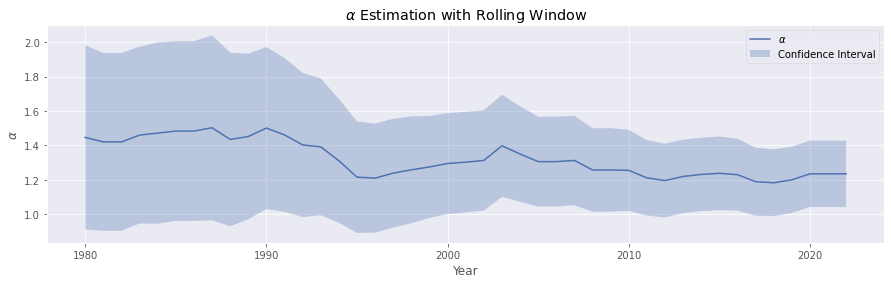

In [12]:
df_pareto_estimations = pd.DataFrame()
for year_start, year_end in zip(range(1900, 1943), range(1980, 2023)):
    
    # Considers only events in the window
    df_tmp = df[df['year'].isin(range(year_start, year_end+1))]

    # Considers only events with total adjusted value greater than uprime
    df_tmp = df_tmp[df_tmp['total_damages_adjusted'] > uprime]

    # Drops events without total damages adjusted
    df_tmp.dropna(subset='total_damages_adjusted', inplace=True)

    # Obtains window intrinsic parameters 
    N = df_tmp.shape[0]
    u = df_tmp['total_damages_adjusted'].min()

    # Calculates alpha by the Hill estimator
    alpha = ( 1/N * np.sum(np.log(df_tmp['total_damages_adjusted']) - np.log(u)) )**-1

    # Obtains alpha's lower bound of the 95% confidence interval
    lci = alpha * (1 + stats.norm.ppf(0.05/2, loc=0, scale=1) / np.sqrt(N))

    # Obtains alpha's upper bound of the 95% confidence interval
    uci = alpha * (1 - stats.norm.ppf(0.05/2, loc=0, scale=1) / np.sqrt(N))

    # Appends estimations to the dataframe
    df_pareto_estimations = df_pareto_estimations.append({
        'year': year_end,
        'alpha': alpha,
        'lci': lci,
        'uci': uci
    }, ignore_index=True)

# Converts dtypes and set year as index
df_pareto_estimations['year'] = df_pareto_estimations['year'].astype(int)
df_pareto_estimations = df_pareto_estimations.set_index('year')

# Plots the estimated alphas and the confidence interval
plt.plot(df_pareto_estimations['alpha'], label=r'$\alpha$')
plt.fill_between(df_pareto_estimations.index, df_pareto_estimations['lci'], df_pareto_estimations['uci'], alpha=0.3, label="Confidence Interval")
plt.title(r"$\alpha$ Estimation with Rolling Window")
plt.xlabel('Year')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.show()

# Puts the dataframe in the expected format and saves it
df_pareto_estimations = df_pareto_estimations.transpose()
df_pareto_estimations.to_csv("./JorgeDeutsch_rolling_alpha.csv")

# Overall Estimates

From now on, the idea is to fit the whole total damages adjusted dataset into a distribution model and obtain, through the distribution, its Value at Risk (VaR) and its Expected Shortfall.

For this part of the project, I decided to use the Pareto Type II distribution to fit the data since, as shown before, fits better the data than Pareto Type II.

## Value at Risk

The value at risk *"summarises the worst possible loss of a portfolio at a given confidence level $\alpha \in (0, 1)$ over a given time period $[t, t+1]$. $VaR_\alpha$ is such that the rate of loss of the portfolio won’t exceed that level over that period with a probability inferior or equal to $1 − \alpha$"* - Eric Vansteenberghe. 

For a Pareto Type II distribution, the Value at Risk can be obtained through the following:

\begin{cases}
    u + \sigma \frac{(1 - \alpha)^{-\xi} - 1}{\xi} \qquad & \text{If} \quad \xi \neq 0  \\
    u - \sigma log(1-\alpha) \qquad & \text{If} \quad \xi = 0
\end{cases}  

*Note: the $\alpha$ in the above equation is the confidence level, not the Pareto parameter.*

Therefore, one can implement this in code by the following:

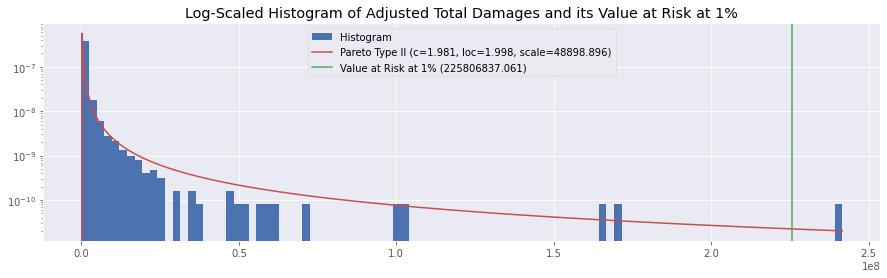

In [13]:
# Obtains the total damages adjusted without nan
total_damages_adjusted = df['total_damages_adjusted'].dropna()

# Obtains the Pareto Type II parameters for the data
xi, loc, scale = stats.genpareto.fit(total_damages_adjusted)

# Calculates the Value at Risk at 1%
VaR = (loc - scale * np.log(0.01)) if xi == 0 else (loc + scale*((0.01)**(-xi) -1)/xi)

# Instantiates a linspace for the x-axis
x = np.linspace(0, total_damages_adjusted.max(), 1000)

# Plots the histogram and the pdfs of the Pareto distributions of the total damages adjusted
plt.hist(total_damages_adjusted, bins=100, density=True, log=True, label='Histogram')
plt.plot(x, stats.genpareto(xi, loc=loc, scale=scale).pdf(x), label=f"Pareto Type II (c={xi:.3f}, loc={loc:.3f}, scale={scale:.3f})")
plt.axvline(x=VaR, label=f"Value at Risk at 1% ({VaR:.3f})", color='#55A868')
plt.title("Log-Scaled Histogram of Adjusted Total Damages and its Value at Risk at 1%")
plt.legend()
plt.show()

# Saves the obtained Value at Risk
with open("./JorgeDeutsch_VaR.csv", 'w+') as f:
    f.write(str(VaR))

## Expected Shortfall 

The Expected Shortfall (ES) is the negative of the expected value of the tail beyond the Value at Risk. 

For a Pareto Type II distribution, the Expected Shortfall can be obtained through the following:

\begin{cases}
    \left| u + \sigma \left[\frac{(1-\alpha)^{-\xi}}{1-\xi} + \frac{(1-\alpha)^{-\xi}-1}{\xi}\right] \right| \qquad & \text{If} \quad \xi \neq 0  \\
    u + \sigma [1 - log(1-\alpha)] \qquad & \text{If} \quad \xi = 0
\end{cases}   

*Note: the $\alpha$ in the above equation is the confidence level, not the Pareto parameter.*

Therefore, one can implement this in code by the following:

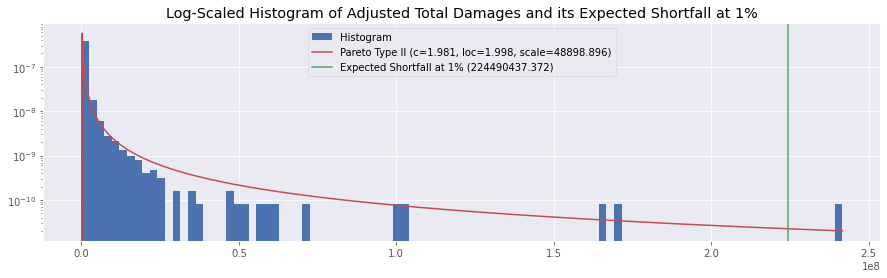

In [14]:
# Obtains the total damages adjusted without nan
total_damages_adjusted = df['total_damages_adjusted'].dropna()

# Obtains the Pareto Type II parameters for the data
xi, loc, scale = stats.genpareto.fit(total_damages_adjusted)

# Calculates the Value at Risk at 1%
ES = u + scale*(1 - np.log(0.01)) if xi == 0 else np.abs(u + scale*(0.01**(-xi)/(1-xi) + (0.01**(-xi) - 1)/xi))

# Instantiates a linspace for the x-axis
x = np.linspace(0, total_damages_adjusted.max(), 1000)

# Plots the histogram and the pdfs of the Pareto distributions of the total damages adjusted
plt.hist(total_damages_adjusted, bins=100, density=True, log=True, label='Histogram')
plt.plot(x, stats.genpareto(xi, loc=loc, scale=scale).pdf(x), label=f"Pareto Type II (c={xi:.3f}, loc={loc:.3f}, scale={scale:.3f})")
plt.axvline(x=ES, label=f"Expected Shortfall at 1% ({ES:.3f})", color='#55A868')
plt.title("Log-Scaled Histogram of Adjusted Total Damages and its Expected Shortfall at 1%")
plt.legend()
plt.show()

# Saves the obtained Expected Shortfall
with open("./JorgeDeutsch_ES.csv", 'w+') as f:
    f.write(str(ES))